### Regressão - Bruno Zabot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.dates as mdates
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

#### Ajustes Iniciais

In [2]:
df = pd.read_csv('../data/data-regressao.csv', sep=';')
df

,DATA,PRECO PETROLEO,PRECO DOLAR,PRECO GASOLINA
0,2004-05-09,37.250,3.060650,1.966
1,2004-05-16,37.618,2.968437,1.961
2,2004-05-23,38.430,3.150200,1.963
3,2004-05-30,37.952,3.146900,1.993
4,2004-06-06,37.254,2.986875,2.001
...,...,...,...,...
864,2020-11-29,46.426,5.365750,4.199
865,2020-12-06,47.828,5.085280,4.210
866,2020-12-13,49.324,5.463433,4.186
867,2020-12-20,51.048,5.085810,4.195


In [3]:
df.rename(
    {
        'PRECO GASOLINA': 'PRECO_GASOLINA',
        'PRECO PETROLEO': 'PRECO_PETROLEO',
        'PRECO DOLAR': 'PRECO_DOLAR'
    },
    axis=1,
    inplace=True)
df

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA
0,2004-05-09,37.250,3.060650,1.966
1,2004-05-16,37.618,2.968437,1.961
2,2004-05-23,38.430,3.150200,1.963
3,2004-05-30,37.952,3.146900,1.993
4,2004-06-06,37.254,2.986875,2.001
...,...,...,...,...
864,2020-11-29,46.426,5.365750,4.199
865,2020-12-06,47.828,5.085280,4.210
866,2020-12-13,49.324,5.463433,4.186
867,2020-12-20,51.048,5.085810,4.195


In [4]:
df['DATA'] = pd.to_datetime(df['DATA'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            869 non-null    datetime64[ns]
 1   PRECO_PETROLEO  869 non-null    float64       
 2   PRECO_DOLAR     869 non-null    float64       
 3   PRECO_GASOLINA  869 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 27.3 KB


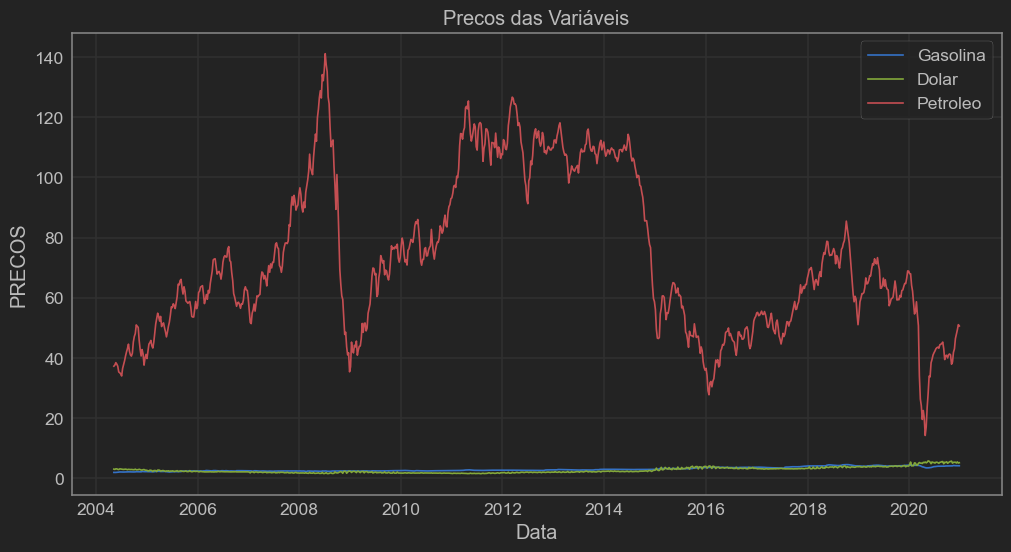

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATA'], df['PRECO_GASOLINA'])
plt.plot(df['DATA'], df['PRECO_DOLAR'])
plt.plot(df['DATA'], df['PRECO_PETROLEO'])
plt.xlabel('Data')
plt.ylabel('PRECOS')

plt.title('Precos das Variáveis')
plt.legend(['Gasolina', 'Dolar', 'Petroleo']);
plt.show()

Agora, verificando pela mudança percentual da semana

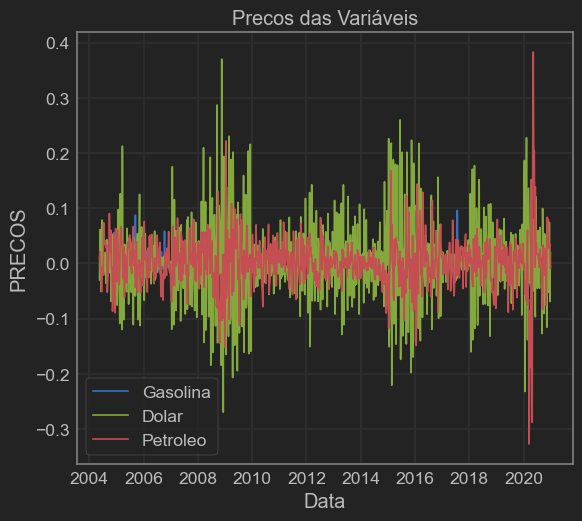

In [6]:
df2 = df.set_index('DATA')
df2 = df2.pct_change().reset_index()
plt.plot(df2['DATA'], df2['PRECO_GASOLINA'])
plt.plot(df2['DATA'], df2['PRECO_DOLAR'])
plt.plot(df2['DATA'], df2['PRECO_PETROLEO'])
plt.xlabel('Data')
plt.ylabel('PRECOS')

plt.title('Precos das Variáveis')
plt.legend(['Gasolina', 'Dolar', 'Petroleo']);
plt.show()

Não é possível tirar informações conclusivas sobre os gráficos, mas podemos calcular o R² para as variáveis, em relação ao preço da gasolina.
Mas, antes disso, filtraremos as datas antes de 2020.

In [7]:
df2 = df[df['DATA']<'2019-12-31']

#### Verificações para regressão

In [8]:
from statsmodels.formula.api import ols

In [9]:
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     35.89
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.14e-09
Time:                        12:46:01   Log-Likelihood:                -795.78
No. Observations:                 817   AIC:                             1596.
Df Residuals:                     815   BIC:                             1605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3500      0.070     48.108      0.000       3.213       3.487
PRECO_PETROLEO    -0.0053      0.001     -5.991      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       53.667   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.950
Skew:                           0.641   Prob(JB):                     9.59e-14
Kurtosis:                       2.654   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model = ols('PRECO_GASOLINA ~ PRECO_DOLAR', data=df2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1719.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.24e-203
Time:                        12:46:01   Log-Likelihood:                -350.04
No. Observations:                 817   AIC:                             704.1
Df Residuals:                     815   BIC:                             713.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1367      0.046     24.847      0.000       1.047       1.227
PRECO_DOLAR     0.7144      0.017     41.457      0.000       0.681       0.748
==============================================================================
Omnibus:                      165.708   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.968
Skew:                          -1.167   Prob(JB):                     7.39e-71
Kurtosis:                       5.011   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Percebe-se que há uma grande diferença no R² do petróleo (0.042) e do dólar (0.678) em relação ao preço da gasolina, aplicaremos um atraso nas datas do petróleo e verificaremos o que ocorre:

In [11]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     36.69
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.11e-09
Time:                        12:46:01   Log-Likelihood:                -792.69
No. Observations:                 816   AIC:                             1589.
Df Residuals:                     814   BIC:                             1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3524      0.070     48.181      0.000       3.216       3.489
PRECO_PETROLEO    -0.0053      0.001     -6.057      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       53.394   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.802
Skew:                           0.641   Prob(JB):                     1.03e-13
Kurtosis:                       2.661   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     37.68
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.30e-09
Time:                        12:46:01   Log-Likelihood:                -789.47
No. Observations:                 815   AIC:                             1583.
Df Residuals:                     813   BIC:                             1592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3557      0.070     48.275      0.000       3.219       3.492
PRECO_PETROLEO    -0.0054      0.001     -6.138      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       53.018   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.497
Skew:                           0.641   Prob(JB):                     1.20e-13
Kurtosis:                       2.667   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     38.67
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           8.01e-10
Time:                        12:46:01   Log-Likelihood:                -786.25
No. Observations:                 814   AIC:                             1577.
Df Residuals:                     812   BIC:                             1586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3590      0.069     48.371      0.000       3.223       3.495
PRECO_PETROLEO    -0.0054      0.001     -6.219      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       52.645   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.163
Skew:                           0.640   Prob(JB):                     1.42e-13
Kurtosis:                       2.673   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     39.74
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.77e-10
Time:                        12:46:01   Log-Likelihood:                -783.04
No. Observations:                 813   AIC:                             1570.
Df Residuals:                     811   BIC:                             1579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3625      0.069     48.469      0.000       3.226       3.499
PRECO_PETROLEO    -0.0055      0.001     -6.304      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       52.241   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.744
Skew:                           0.638   Prob(JB):                     1.75e-13
Kurtosis:                       2.677   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     40.70
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.99e-10
Time:                        12:46:01   Log-Likelihood:                -779.94
No. Observations:                 812   AIC:                             1564.
Df Residuals:                     810   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3656      0.069     48.551      0.000       3.229       3.502
PRECO_PETROLEO    -0.0056      0.001     -6.379      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       51.856   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.306
Skew:                           0.637   Prob(JB):                     2.18e-13
Kurtosis:                       2.680   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\2016581567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PRECO_PETROLEO'] = df2['PRECO_PETROLEO'].shift(periods=-1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     41.62
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.90e-10
Time:                        12:46:02   Log-Likelihood:                -777.08
No. Observations:                 811   AIC:                             1558.
Df Residuals:                     809   BIC:                             1568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3687      0.069     48.612      0.000       3.233       3.505
PRECO_PETROLEO    -0.0056      0.001     -6.452      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       51.545   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.987
Skew:                           0.636   Prob(JB):                     2.56e-13
Kurtosis:                       2.683   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regressão a partir de 2017

Mesmo adicionando um delay de 6 semanas na variável do petróleo não houveram grandes alterações no R²

Baseado na seguinte [noticia](https://petrobras.com.br/fatos-e-dados/adotamos-nova-politica-de-precos-de-diesel-e-gasolina.htm), datada de outubro de 2016, filtraremos somente os valores a partir de 2017

In [17]:
df2 = df[(df['DATA']<'2019-12-31') & (df['DATA']>='2017-01-01')]
df2

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA
660,2017-01-01,54.9600,3.270360,3.694
661,2017-01-08,55.1275,3.156860,3.679
662,2017-01-15,54.0160,3.219663,3.711
663,2017-01-22,54.1940,3.214500,3.691
664,2017-01-29,54.9060,3.168980,3.692
...,...,...,...,...
812,2019-12-01,64.7400,4.230360,4.296
813,2019-12-08,64.7140,3.833933,4.317
814,2019-12-15,66.4980,4.104112,4.332
815,2019-12-22,68.9020,4.069560,4.339


In [18]:
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     583.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.07e-54
Time:                        12:46:02   Log-Likelihood:                 88.094
No. Observations:                 157   AIC:                            -172.2
Df Residuals:                     155   BIC:                            -166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1568      0.079     27.312      0.000       2.001       2.313
PRECO_PETROLEO     0.0299      0.001     24.153      0.000       0.027       0.032
==============================================================================
Omnibus:                        4.101   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.797
Skew:                           0.378   Prob(JB):                        0.150
Kurtosis:                       3.096   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model = ols('PRECO_GASOLINA ~ PRECO_DOLAR', data=df2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.11e-26
Time:                        12:46:02   Log-Likelihood:                 22.091
No. Observations:                 157   AIC:                            -40.18
Df Residuals:                     155   BIC:                            -34.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8327      0.174     10.542      0.000       1.489       2.176
PRECO_DOLAR     0.6147      0.048     12.787      0.000       0.520       0.710
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.904
Skew:                           0.105   Prob(JB):                        0.636
Kurtosis:                       2.694   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Claramente houve uma imensa melhoria no R² pós 2017

In [20]:
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO + PRECO_DOLAR', data=df2)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     572.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.83e-72
Time:                        12:46:02   Log-Likelihood:                 132.97
No. Observations:                 157   AIC:                            -259.9
Df Residuals:                     154   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4534      0.088     16.553      0.000       1.280       1.627
PRECO_PETROLEO     0.0238      0.001     21.870      0.000       0.022       0.026
PRECO_DOLAR        0.3024      0.028     10.898      0.000       0.248       0.357
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.235
Skew:                           0.049   Prob(JB):                        0.889
Kurtosis:                       2.837   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Baseado nas duas váriaveis (utilizando o range 2017-2019), é possível obter um R² de 0.881.  
Agora colocaremos um comparativo, da previsão e do valor real da gasolina para 2020:
    

In [21]:
df_2020 = df[df['DATA']>='2020-01-01']
df_2020

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA
817,2020-01-05,67.9940,4.560330,4.336
818,2020-01-12,67.9300,5.410380,4.355
819,2020-01-19,64.1120,4.154390,4.352
820,2020-01-26,62.2000,4.183300,4.346
821,2020-02-02,58.5720,4.192408,4.344
822,2020-02-09,54.5940,5.146410,4.319
823,2020-02-16,55.3280,5.057920,4.300
824,2020-02-23,58.6440,4.358400,4.319
825,2020-03-01,54.2420,4.368092,4.305
826,2020-03-08,50.7020,4.962692,4.292


In [22]:
df_2020['PRECO_GASOL_PREV'] = response.predict(df_2020)
df_2020

C:\Users\bruno\AppData\Local\Temp\ipykernel_11912\121977631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['PRECO_GASOL_PREV'] = response.predict(df_2020)


,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA,PRECO_GASOL_PREV
817,2020-01-05,67.9940,4.560330,4.336,4.451292
818,2020-01-12,67.9300,5.410380,4.355,4.706865
819,2020-01-19,64.1120,4.154390,4.352,4.236104
820,2020-01-26,62.2000,4.183300,4.346,4.199332
821,2020-02-02,58.5720,4.192408,4.344,4.115722
822,2020-02-09,54.5940,5.146410,4.319,4.309561
823,2020-02-16,55.3280,5.057920,4.300,4.300270
824,2020-02-23,58.6440,4.358400,4.319,4.167640
825,2020-03-01,54.2420,4.368092,4.305,4.065780
826,2020-03-08,50.7020,4.962692,4.292,4.161346


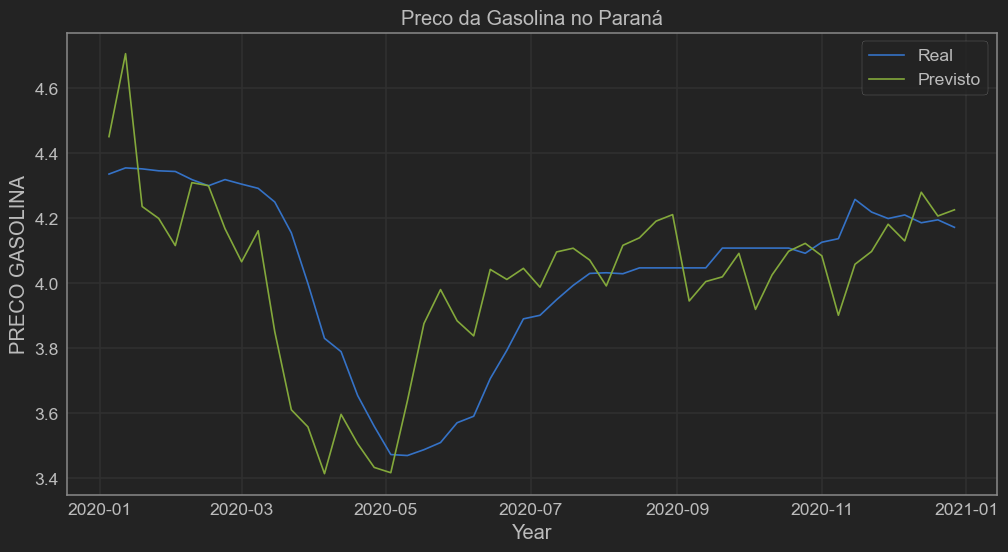

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(df_2020['DATA'], df_2020['PRECO_GASOLINA'])
plt.plot(df_2020['DATA'], df_2020['PRECO_GASOL_PREV'])

plt.xlabel('Year')
plt.ylabel('PRECO GASOLINA');

plt.title('Preco da Gasolina no Paraná')
plt.legend(['Real', 'Previsto']);
plt.show()

Prevendo o preço atual da gasolina utilizando o modelo acima:

In [24]:
 df_teste = {
     'DATA': '2022-11-26',
     'PRECO_PETROLEO': 83.91,
     'PRECO_DOLAR': 5.41,
 }
    
response.predict(df_teste)
    

0    5.087158
dtype: float64

#### Agora, será utilizando a mudança percentual nos preços para verificação do modelo.

In [25]:
df_pct = df.set_index('DATA').pct_change()
df_pct

,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA
DATA,,,
2004-05-09,NaN,NaN,NaN
2004-05-16,0.009879,-0.030128,-0.002543
2004-05-23,0.021585,0.061232,0.001020
2004-05-30,-0.012438,-0.001048,0.015283
2004-06-06,-0.018392,-0.050852,0.004014
...,...,...,...
2020-11-29,0.079474,0.001592,-0.004740
2020-12-06,0.030199,-0.052270,0.002620
2020-12-13,0.031279,0.074362,-0.005701


In [26]:
df_pct = df_pct.reset_index()
df_pct = df_pct[df_pct['DATA']<'2020-01-01']
df_pct.dropna(inplace=True)
df_pct

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA
1,2004-05-16,0.009879,-0.030128,-0.002543
2,2004-05-23,0.021585,0.061232,0.001020
3,2004-05-30,-0.012438,-0.001048,0.015283
4,2004-06-06,-0.018392,-0.050852,0.004014
5,2004-06-13,-0.051323,-0.025185,0.029485
...,...,...,...,...
812,2019-12-01,0.015338,0.008073,0.018492
813,2019-12-08,-0.000402,-0.093710,0.004888
814,2019-12-15,0.027567,0.070470,0.003475
815,2019-12-22,0.036151,-0.008419,0.001616


In [27]:
model = ols('PRECO_GASOLINA ~ PRECO_DOLAR', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003149
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.955
Time:                        12:46:02   Log-Likelihood:                 2502.1
No. Observations:                 816   AIC:                            -5000.
Df Residuals:                     814   BIC:                            -4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0010      0.000      2.602      0.009       0.000       0.002
PRECO_DOLAR     0.0003      0.006      0.056      0.955      -0.011       0.012
==============================================================================
Omnibus:                      609.494   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14181.428
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      22.435   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.485
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0111
Time:                        12:46:02   Log-Likelihood:                 2505.4
No. Observations:                 816   AIC:                            -5007.
Df Residuals:                     814   BIC:                            -4997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0010      0.000      2.516      0.012       0.000       0.002
PRECO_PETROLEO     0.0251      0.010      2.547      0.011       0.006       0.044
==============================================================================
Omnibus:                      609.505   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14464.175
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      22.653   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df_pct2 = df_pct[df_pct['DATA']>'2017-01-01']

In [30]:
model = ols('PRECO_GASOLINA ~ PRECO_DOLAR', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003149
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.955
Time:                        12:46:02   Log-Likelihood:                 2502.1
No. Observations:                 816   AIC:                            -5000.
Df Residuals:                     814   BIC:                            -4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0010      0.000      2.602      0.009       0.000       0.002
PRECO_DOLAR     0.0003      0.006      0.056      0.955      -0.011       0.012
==============================================================================
Omnibus:                      609.494   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14181.428
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      22.435   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.485
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0111
Time:                        12:46:02   Log-Likelihood:                 2505.4
No. Observations:                 816   AIC:                            -5007.
Df Residuals:                     814   BIC:                            -4997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0010      0.000      2.516      0.012       0.000       0.002
PRECO_PETROLEO     0.0251      0.010      2.547      0.011       0.006       0.044
==============================================================================
Omnibus:                      609.505   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14464.175
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      22.653   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Como o R² encontrado é muito baixo,  testaremos mais alguns ajustes

In [32]:
df_pct = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_pct = df_pct[(df_pct['DATA']<'2020-01-01') & (df_pct['DATA']>='2017-01-01')]
df_pct['PRECO_PETROLEO'] = df_pct['PRECO_PETROLEO'].shift(periods=-1)
df_pct['PRECO_DOLAR'] = df_pct['PRECO_DOLAR'].shift(periods=-1)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO + PRECO_DOLAR', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.091
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.127
Time:                        12:47:05   Log-Likelihood:                -239.63
No. Observations:                 156   AIC:                             485.3
Df Residuals:                     153   BIC:                             494.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1002      0.091      1.099      0.274      -0.080       0.280
PRECO_PETROLEO     0.0523      0.027      1.914      0.057      -0.002       0.106
PRECO_DOLAR        0.0144      0.019      0.774      0.440      -0.022       0.051
==============================================================================
Omnibus:                      172.470   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6016.801
Skew:                           4.012   Prob(JB):                         0.00
Kurtosis:                      32.348   Cond. No.                         4.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df_2020 = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_2020 = df_2020[(df_2020['DATA']>='2020-01-01')]
df_2020['PRECO_GASOL_PREV'] = response.predict(df_2020)
df_2020

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA,PRECO_GASOL_PREV
816,2020-01-05,-1.223197,12.000363,0.161700,0.208586
817,2020-01-12,-0.094126,18.640098,0.438192,0.363049
818,2020-01-19,-5.620492,-23.214451,-0.068886,-0.527390
819,2020-01-26,-2.982281,0.695890,-0.137868,-0.045854
820,2020-02-02,-5.832797,0.217731,-0.046019,-0.201868
821,2020-02-09,-6.791641,22.755457,-0.575506,0.071743
822,2020-02-16,1.344470,-1.719451,-0.439917,0.145831
823,2020-02-23,5.993349,-13.830191,0.441860,0.215085
824,2020-03-01,-7.506309,0.222368,-0.324149,-0.289363
825,2020-03-08,-6.526308,13.612352,-0.301974,-0.045725


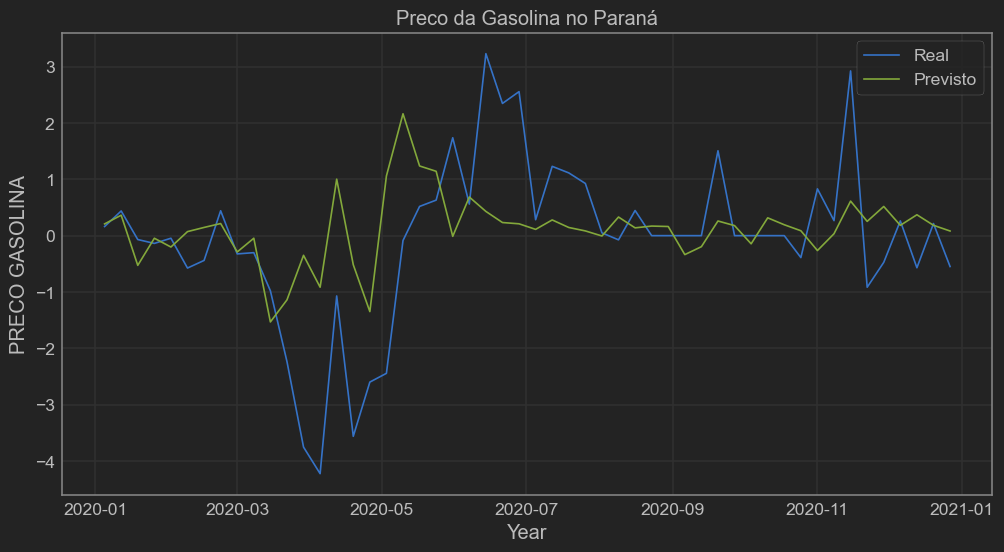

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(df_2020['DATA'], df_2020['PRECO_GASOLINA'])
plt.plot(df_2020['DATA'], df_2020['PRECO_GASOL_PREV'])

plt.xlabel('Year')
plt.ylabel('PRECO GASOLINA');

plt.title('Preco da Gasolina no Paraná')
plt.legend(['Real', 'Previsto']);
plt.show()

Com duas semanas de delay

In [36]:
df_pct = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_pct = df_pct[(df_pct['DATA']<'2020-01-01') & (df_pct['DATA']>='2017-01-01')]
df_pct['PRECO_PETROLEO'] = df_pct['PRECO_PETROLEO'].shift(periods=-2)
df_pct['PRECO_DOLAR'] = df_pct['PRECO_DOLAR'].shift(periods=-2)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO + PRECO_DOLAR', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.840
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.162
Time:                        12:51:49   Log-Likelihood:                -238.82
No. Observations:                 155   AIC:                             483.6
Df Residuals:                     152   BIC:                             492.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1052      0.092      1.144      0.254      -0.076       0.287
PRECO_PETROLEO     0.0519      0.027      1.890      0.061      -0.002       0.106
PRECO_DOLAR       -0.0052      0.019     -0.278      0.781      -0.042       0.032
==============================================================================
Omnibus:                      172.138   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5899.316
Skew:                           4.042   Prob(JB):                         0.00
Kurtosis:                      32.122   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df_2020 = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_2020 = df_2020[(df_2020['DATA']>='2020-01-01')]
df_2020['PRECO_GASOL_PREV'] = response.predict(df_2020)
df_2020

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA,PRECO_GASOL_PREV
816,2020-01-05,-1.223197,12.000363,0.161700,-0.020659
817,2020-01-12,-0.094126,18.640098,0.438192,0.003425
818,2020-01-19,-5.620492,-23.214451,-0.068886,-0.065820
819,2020-01-26,-2.982281,0.695890,-0.137868,-0.053191
820,2020-02-02,-5.832797,0.217731,-0.046019,-0.198652
821,2020-02-09,-6.791641,22.755457,-0.575506,-0.365582
822,2020-02-16,1.344470,-1.719451,-0.439917,0.183931
823,2020-02-23,5.993349,-13.830191,0.441860,0.488175
824,2020-03-01,-7.506309,0.222368,-0.324149,-0.285535
825,2020-03-08,-6.526308,13.612352,-0.301974,-0.304280


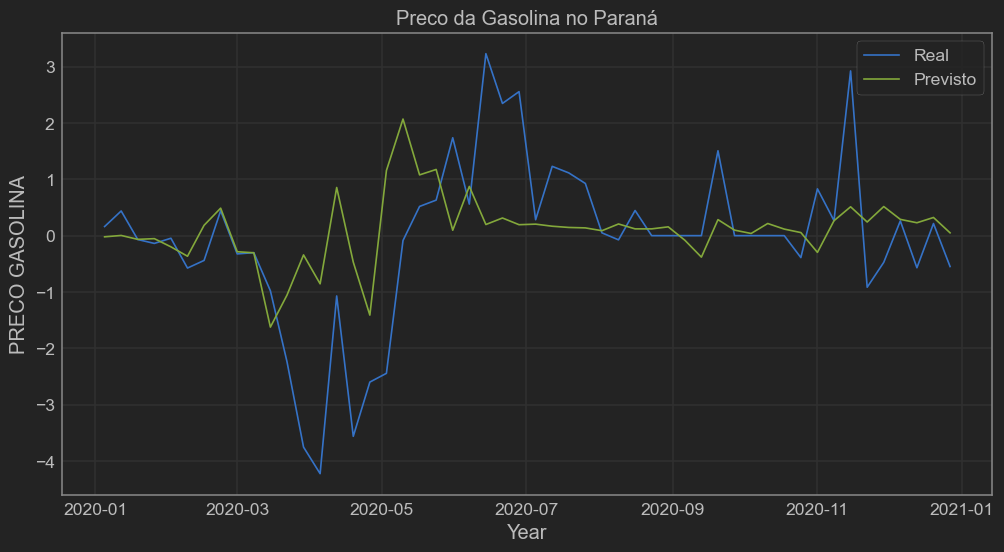

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(df_2020['DATA'], df_2020['PRECO_GASOLINA'])
plt.plot(df_2020['DATA'], df_2020['PRECO_GASOL_PREV'])

plt.xlabel('Year')
plt.ylabel('PRECO GASOLINA');

plt.title('Preco da Gasolina no Paraná')
plt.legend(['Real', 'Previsto']);
plt.show()

Com tres semanas de delay

In [39]:
df_pct = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_pct = df_pct[(df_pct['DATA']<'2020-01-01') & (df_pct['DATA']>='2017-01-01')]
df_pct['PRECO_PETROLEO'] = df_pct['PRECO_PETROLEO'].shift(periods=-3)
df_pct['PRECO_DOLAR'] = df_pct['PRECO_DOLAR'].shift(periods=-3)
model = ols('PRECO_GASOLINA ~ PRECO_PETROLEO + PRECO_DOLAR', data=df_pct)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PRECO_GASOLINA   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.936
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.148
Time:                        12:51:50   Log-Likelihood:                -237.65
No. Observations:                 154   AIC:                             481.3
Df Residuals:                     151   BIC:                             490.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0985      0.092      1.065      0.289      -0.084       0.281
PRECO_PETROLEO     0.0524      0.028      1.901      0.059      -0.002       0.107
PRECO_DOLAR        0.0104      0.019      0.558      0.578      -0.027       0.047
==============================================================================
Omnibus:                      178.594   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.728
Skew:                           4.285   Prob(JB):                         0.00
Kurtosis:                      34.504   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
df_2020 = (df
          .set_index('DATA')
          .pct_change()
          .mul(100)
          .dropna()
          .reset_index()
        )
df_2020 = df_2020[(df_2020['DATA']>='2020-01-01')]
df_2020['PRECO_GASOL_PREV'] = response.predict(df_2020)
df_2020

,DATA,PRECO_PETROLEO,PRECO_DOLAR,PRECO_GASOLINA,PRECO_GASOL_PREV
816,2020-01-05,-1.223197,12.000363,0.161700,0.159743
817,2020-01-12,-0.094126,18.640098,0.438192,0.288297
818,2020-01-19,-5.620492,-23.214451,-0.068886,-0.438657
819,2020-01-26,-2.982281,0.695890,-0.137868,-0.050570
820,2020-02-02,-5.832797,0.217731,-0.046019,-0.205007
821,2020-02-09,-6.791641,22.755457,-0.575506,-0.019838
822,2020-02-16,1.344470,-1.719451,-0.439917,0.151034
823,2020-02-23,5.993349,-13.830191,0.441860,0.268245
824,2020-03-01,-7.506309,0.222368,-0.324149,-0.292694
825,2020-03-08,-6.526308,13.612352,-0.301974,-0.101440


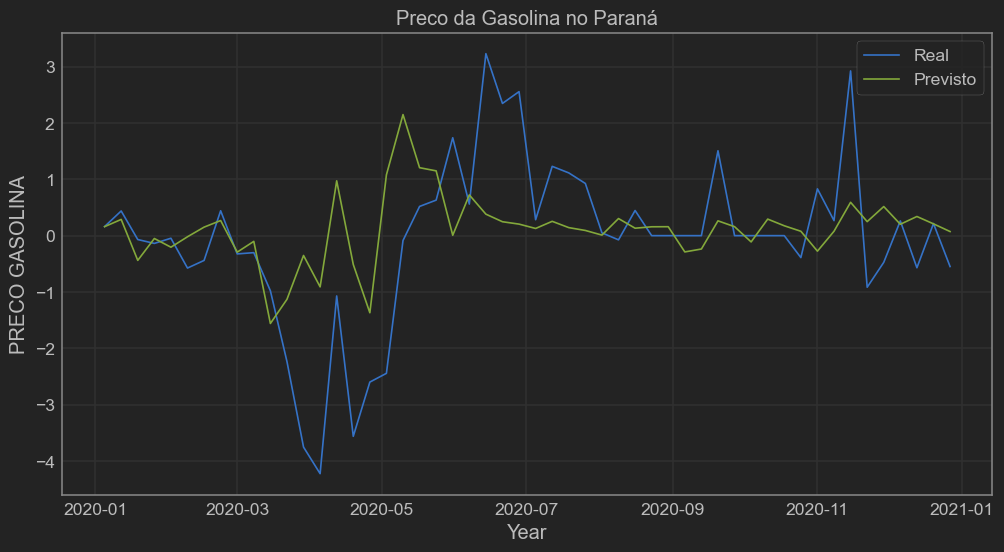

In [41]:
plt.figure(figsize=(12, 6))

plt.plot(df_2020['DATA'], df_2020['PRECO_GASOLINA'])
plt.plot(df_2020['DATA'], df_2020['PRECO_GASOL_PREV'])

plt.xlabel('Year')
plt.ylabel('PRECO GASOLINA');

plt.title('Preco da Gasolina no Paraná')
plt.legend(['Real', 'Previsto']);
plt.show()